Importing the Dependecies

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


Data Collection and Preprocessing

In [2]:
1 # Loading CSV Data to pandas dataframe(structured table)
heart_data=pd.read_csv('/content/dataset.csv')

In [3]:
#print first 5 rows of dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#print last 5 rows of dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [6]:
#getting some information about data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#statistical measure about data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#checking distribution of target variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1--> Defective Heart
0--> Healthy Heart

Splitting Features and Target

In [10]:
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

In [11]:
print(X)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]


In [12]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting Data into Training data & Test Data

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [14]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


In [15]:
print(Y.shape,Y_train.shape,Y_test.shape)

(303,) (242,) (61,)


Model Training

Logistic Regression

In [16]:
model=LogisticRegression()

In [17]:
#training Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Model Evaluation

Accuracy Score

In [18]:
#accuracy on training data
Accuracies={}

X_train_Prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_Prediction,Y_train)

In [19]:
print('Accuracy on Training data',training_data_accuracy)

Accuracy on Training data 0.8512396694214877


In [20]:
#accuracy on test data
X_test_Prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_Prediction,Y_test)
Accuracies['Logisitic Regression']=test_data_accuracy

In [21]:
print('Accuracy on Testing data',test_data_accuracy)

Accuracy on Testing data 0.819672131147541


In [22]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier()
dtc_model.fit(X_train,Y_train)
dtc_prediction = dtc_model.predict(X_test)
dtc_accuracy=dtc_model.score(X_test,Y_test)
Accuracies['Decision Tree Clasifier']=dtc_accuracy
print('Accuracy on Decison_Tree_Classifier is',dtc_accuracy)

Accuracy on Decison_Tree_Classifier is 0.7704918032786885


In [23]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf_model.fit(X_train,Y_train)
rf_prediction = rf_model.predict(X_test)
rf_accuracy = rf_model.score(X_test,Y_test)
Accuracies['RandomForestClassifier'] = rf_accuracy
print("Testing Accuracty of RandomForestClassifier Model : ",rf_accuracy)

Testing Accuracty of RandomForestClassifier Model :  0.7704918032786885


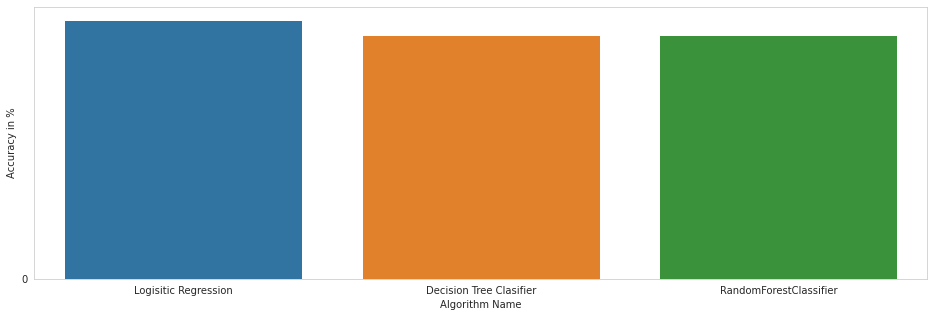

In [39]:
# we will plot accuracy plots of algorithms
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy in %")
plt.xlabel("Algorithm Name")
sns.barplot(y=list(Accuracies.values()),x=list(Accuracies.keys()))
plt.show()

Building a Predicitive System

In [40]:
input_data = (62,0,1,140,268,0,0,160,0,3.6,0,2,2)

#change the input data as numpy array

input_data_as_numpy_array = np.array(input_data)

#reshape the numpy array as we are predicting for only one instance data point

input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)

print(prediction)

if(prediction[0]==0):
  print('the person does not have a disease')
else:
  print('disease')

[0]
the person does not have a disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
